In [11]:
exp_name = "exp0.txt"

x_score = []
GT = [] 

with open(exp_name, "r") as f:
    tmp = f.readline()
    
    while tmp: 
        x = tmp.split(' ')
        x_score.append(float(x[0])) 
        GT.append(int(x[1][:-1]))
        tmp = f.readline()
    # x_score.append()

# print(x_score)

In [19]:
from sklearn.metrics import roc_curve, auc
FPR, TPR, thresholds = roc_curve(GT, x_score)  

In [16]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(GT, x_score)

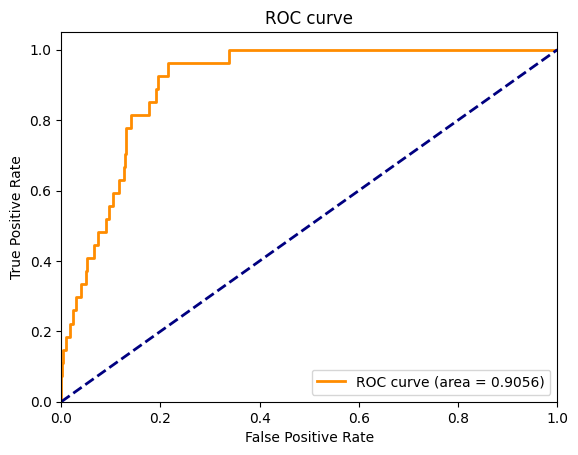

In [26]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(FPR, TPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()